# Introduction to Neural Networks: Bank Churn prediction

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary:

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [ ]:
!pip3 install scikeras

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# Library to split data
from sklearn.model_selection import train_test_split
# Library to encode the variables
from sklearn import preprocessing
# To plot confusion matrix
from sklearn.metrics import confusion_matrix
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
#To import different metrics
from sklearn import metrics
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from tensorflow.keras import backend
# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")
# importing different functions to build models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
''' from tensorflow.keras.wrappers.scikit_learn import KerasClassifier '''
from scikeras.wrappers import KerasClassifier
import tensorflow as tf
# importing GridSearch CV
from sklearn.model_selection import GridSearchCV
# importing roc_curve to plot
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# importing SMOTE
from imblearn.over_sampling import SMOTE
# importing metrics
from sklearn import metrics
import random
#Importing classback API
from keras import callbacks

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data =  pd.read_csv('/content/drive/My Drive/Data/nnetwork/bank_NN.csv')
df = data.copy()

## Data Overview

In [ ]:
# view first 5 rows of data
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# check shape of data set
df.shape

(10000, 14)

There are 10,000 rows and 14 columns.

In [ ]:
# check summary information of sata set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


(3) Data types (category, int64, and float64) w/ no missing values

In [ ]:
# check statistical summary of the sample
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [ ]:
for i in df.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(df[i].value_counts())
    print("*" * 50)

Unique values in Surname are :
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64
**************************************************
Unique values in Geography are :
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
**************************************************
Unique values in Gender are :
Male      5457
Female    4543
Name: Gender, dtype: int64
**************************************************


**Surname**:  This column is unique to the customer and isn't important to the prediction
<br>
**Geography**:  3 countries represented with France accounting for > 50%
<br>
**Gender**:  slightly more males than females


In [ ]:
# drop the customer ID
df.drop('CustomerId', inplace=True, axis=1)
# drop the row number
df.drop('Surname', inplace=True, axis=1)
# drop the customer's surname
df.drop('RowNumber', inplace=True, axis=1)

In [ ]:
# verifying no missing values exist
df.isna().any()

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of the credit score of customers? Are there any noticeable patterns or outliers in the distribution?
  * (Credit scores range from 350 - 850 with a normal distribution curve -- except for the spike of customers who have a credit score of 850)
2. How many active members are there with the bank?
  * (There are 5,151 Active Members)
3. How are the different customer attributes correlated to each other?
  * (There isn't much correlation between the individual data points)
4. Who is churning more when compared to males and females?
  * (Females are more likely to churn, according to the data)
5. Customers from which geographical part are churning more?
  * (German customers are churning more than French and Spanish customers)

### Visualization Functions

In [ ]:
'''
Function that formats a print function to recognize
numbers and display them in bold, with blue font.
The function can convert numbers into dollars with the
'in_thousands' argument and can also convert numbers
to a percentage with two decimal places if 'pct' is True.
'''
def fmt(*args, decimals=4, in_thousands=False, pct=False):
    for i, arg in enumerate(args):
        next_arg = args[i + 1] if i + 1 < len(args) else None

        if isinstance(arg, (int, float, np.number)):
            # Convert to percentage if pct is True and set decimal places to 2
            if pct:
                arg = arg * 100  # Convert to percentage
                formatted_arg = f'{arg:.2f}%'  # Format with 2 decimal places for percentage
            else:
                # If in_thousands is True, convert the number to thousands and format as an integer
                if in_thousands:
                    arg = int(arg * 1000)  # Convert to thousands and ensure it's an integer

                # Format as a comma-separated string if it's an integer type
                if isinstance(arg, (int, np.integer)):
                    formatted_arg = f'{arg:,}'  # For integer types
                    if in_thousands:
                        formatted_arg = f'${formatted_arg}'  # Add the dollar sign if in_thousands is True
                else:  # For floating-point types
                    formatted_arg = f'{arg:.{decimals}f}'  # Regular floating-point format
                    if in_thousands:
                        formatted_arg = f'${formatted_arg}'  # Add the dollar sign if in_thousands is True

            print(f'\033[1m\033[94m{formatted_arg}\033[0m', end='' if isinstance(next_arg, str) else ' ')
        else:
            print(arg, end='' if isinstance(next_arg, (int, float, np.number)) else ' ')

    print()

In [ ]:
# Formatting function to display statistics
def spilltea(feature):
  teaMax = df[feature].max()
  teaMin = df[feature].min()
  teaAvg = df[feature].mean()
  teaMod = df[feature].mode()[0]
  fmt('The maximum value is: ', teaMax)
  fmt('The minimum value is: ', teaMin)
  fmt('The average value is: ', teaAvg)
  fmt('The most common value is: ', teaMod)
  print('')

In [ ]:
# Function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(10, 5), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    spilltea(feature)

In [ ]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
''' function to create pie charts
    for feature variables '''
def piechart(data, feature, x, y):
    print(data[feature].value_counts())
    labels = [x, y]
    sizes = [data[feature][data[feature]==1].count(), data[feature][data[feature]==0].count()]
    explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Not Looking for job change')
    fig1, ax1 = plt.subplots(figsize=(8, 5))
    ax1.pie(sizes, explode=explode, labels=labels, colors=['blue','gray'], autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Proportion of '+feature , size = 20)
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]

    # Crosstab with counts
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(by=sorter, ascending=False)

    # Calculate the percentage of the binary value 1
    tab1['Percentage (%)'] = (tab1[1] / tab1['All']) * 100

    print(tab1)
    print("-" * 120)

    # Plotting the stacked bar chart using normalized crosstab
    tab_normalized = pd.crosstab(data[predictor], data[target], normalize='index').sort_values(by=sorter, ascending=False)
    tab_normalized.plot(kind="bar", stacked=True, figsize=(count + 1, 5), color=['navy', 'lightgreen'])
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.title(f'Stacked Bar Plot of {predictor} vs {target}')
    plt.xlabel(predictor)
    plt.ylabel('Percentage')
    plt.show()


In [ ]:
# Function to plot distributions
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

#### Credit Score

The maximum value is: 850 
The minimum value is: 350 
The average value is: 650.5288 
The most common value is: 850 



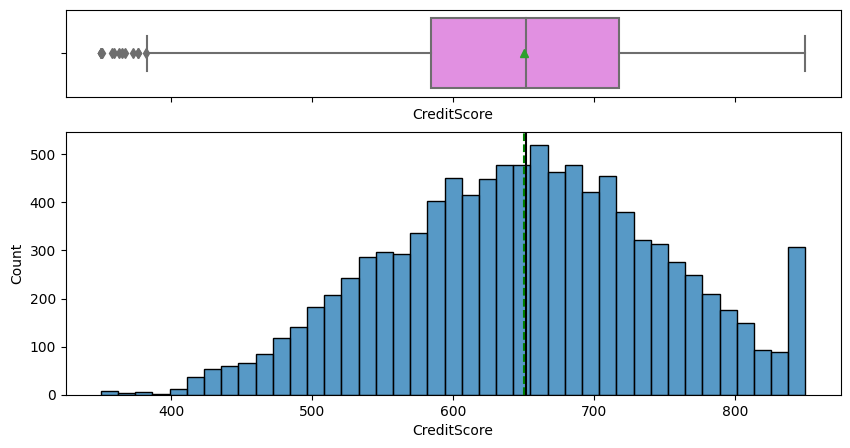

In [ ]:
histogram_boxplot(df,'CreditScore')

**Observations**

* Slightly left-skewed
* There's a significant difference between mean and median with most common credit score being 850.
* Outliers present at lower-end of scores

#### Age

The maximum value is: 92 
The minimum value is: 18 
The average value is: 38.9218 
The most common value is: 37 



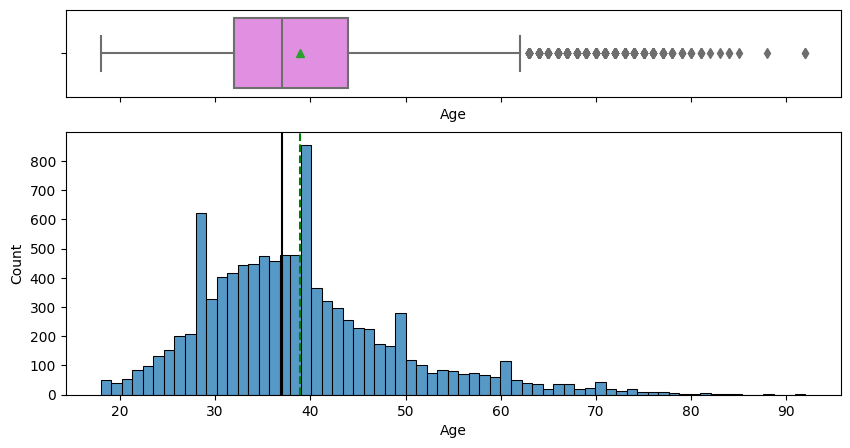

In [ ]:
histogram_boxplot(df,'Age')

**Observations**

* The average age of the bank's customers is 39 yrs old.
* The 4th quartile range extends to about 62 years old. It's interesting to note that older customers are represented as outliers. This could be due to a variety of reasons (i.e., average life expectency, cash-rich traditions, etc.)


####Tenure

The maximum value is: 10 
The minimum value is: 0 
The average value is: 5.0128 
The most common value is: 2 



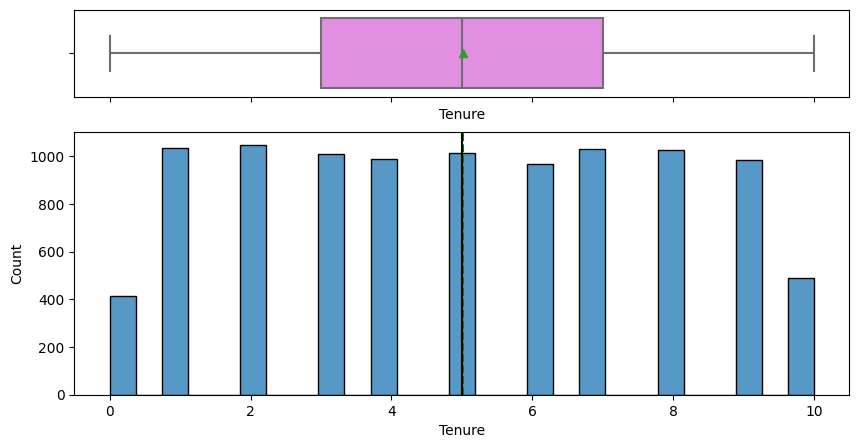

In [ ]:
histogram_boxplot(df,'Tenure')

**Observations**
* No customer has been with the bank longer than 10 years. This could mean that the bank is only 10 years old.
* The most common tenure among customers is 2 years. This indicates growth for the bank as new customers were onboarded.
* The average tenure is 5 years.

####Balance

The maximum value is: 250898.0900 
The minimum value is: 0.0000 
The average value is: 76485.8893 
The most common value is: 0.0000 



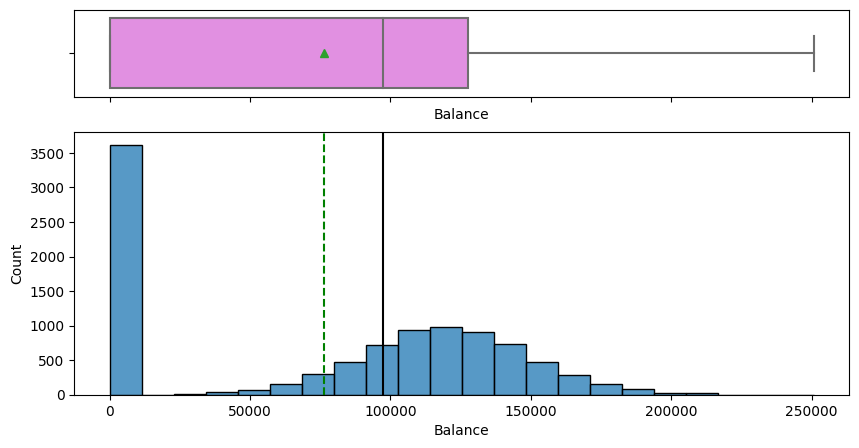

In [ ]:
histogram_boxplot(df,'Balance')

In [ ]:
zerobalance = (df['Balance'] == 0).sum()
fmt(zerobalance, ' customers have $0 in their banking account')

3,617 customers have $0 in their banking account 


**Observations**

* More than a third of the bank's customer have $0 in their banking account

####NumOfProducts

The maximum value is: 4 
The minimum value is: 1 
The average value is: 1.5302 
The most common value is: 1 



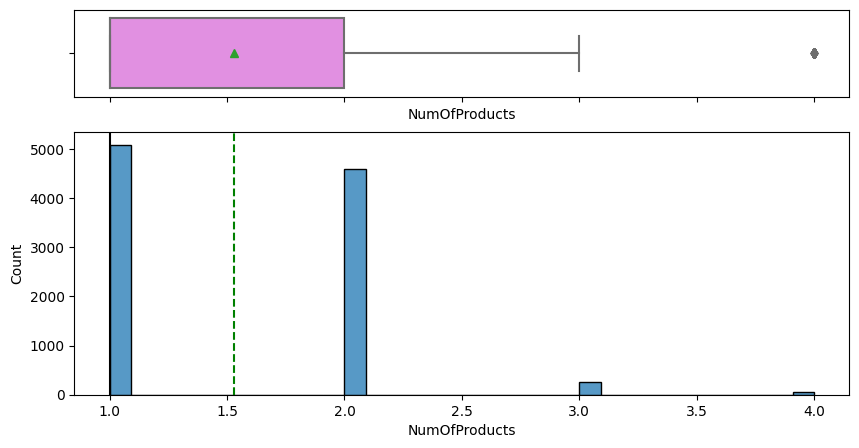

In [ ]:
histogram_boxplot(df,'NumOfProducts')

**Observations**

* Customers tend to utilize either 1 or 2 banking products
* Very few customers use either 3 or 4 products.

####HasCrCard

1    7055
0    2945
Name: HasCrCard, dtype: int64


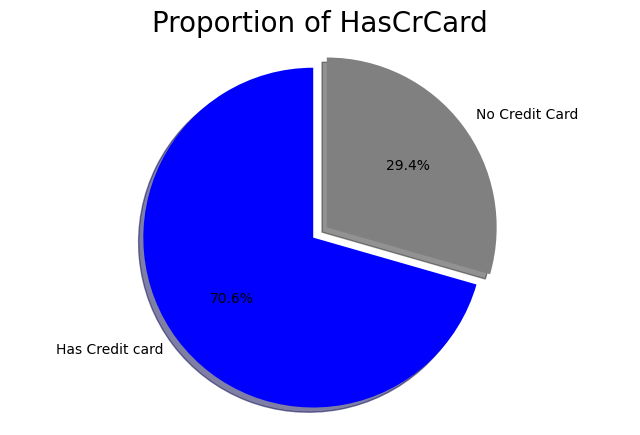

In [ ]:
piechart(df,'HasCrCard', 'Has Credit card', 'No Credit Card')

**Observations**
* Most of the bank's customers have a credit card

####IsActivemember

1    5151
0    4849
Name: IsActiveMember, dtype: int64


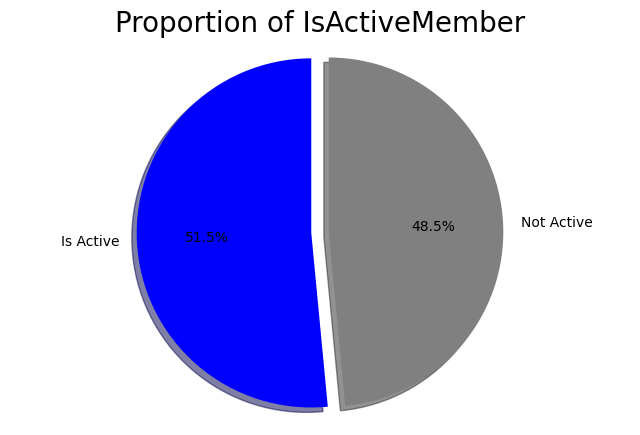

In [ ]:
piechart(df,'IsActiveMember', 'Is Active', 'Not Active')

**Observations**

* Members are pretty evenly split between having a credit card (and not having one)

####EstimatedSalary

The maximum value is: 199992.4800 
The minimum value is: 11.5800 
The average value is: 100090.2399 
The most common value is: 24924.9200 



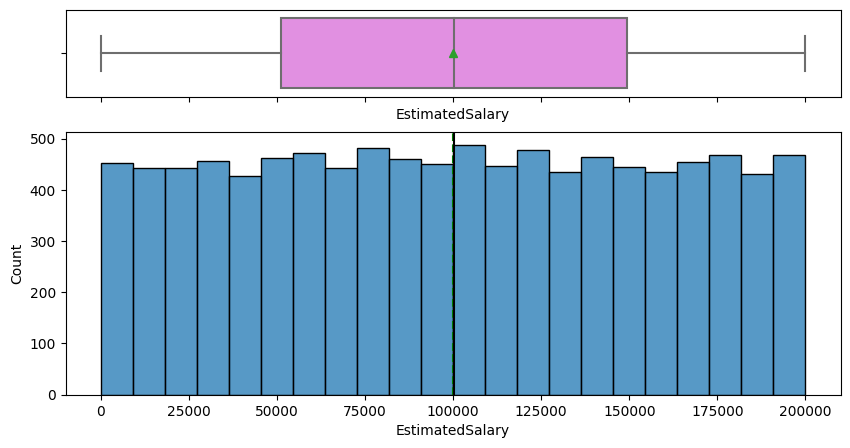

In [ ]:
histogram_boxplot(df,'EstimatedSalary')

**Observations**

* Salaries are fairly evenly distributed.


####Exited

0    7963
1    2037
Name: Exited, dtype: int64


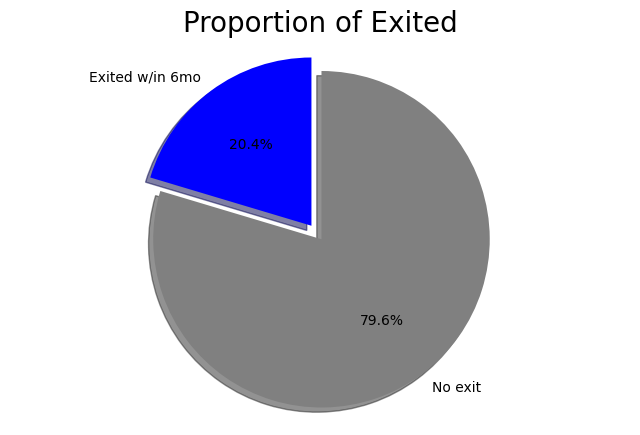

In [ ]:
piechart(df, 'Exited', 'Exited w/in 6mo', 'No exit')

**Observations**

* This is our target variable
* About 20% of the customers exited the bank within 6 months.

####Geography

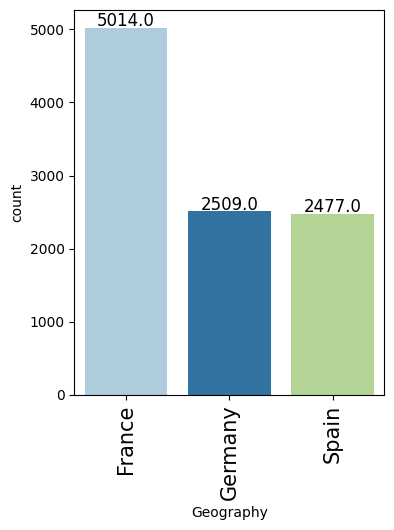

In [ ]:
labeled_barplot(df, 'Geography')

**Observations**

* More than half of the banks customers are from France.
* Germany and Spain share very similar distributions.

####Gender

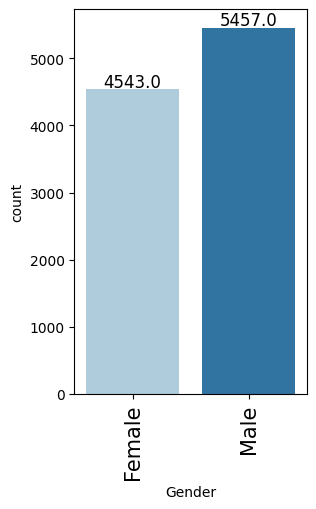

In [ ]:
labeled_barplot(df, 'Gender')

**Observations**

* Despite Germany, France, and Spain all having more women than men in the country (based on a google search), men are the dominant customer gender at the bank.

###Multi-Variate Analysis

####Variable Correlations

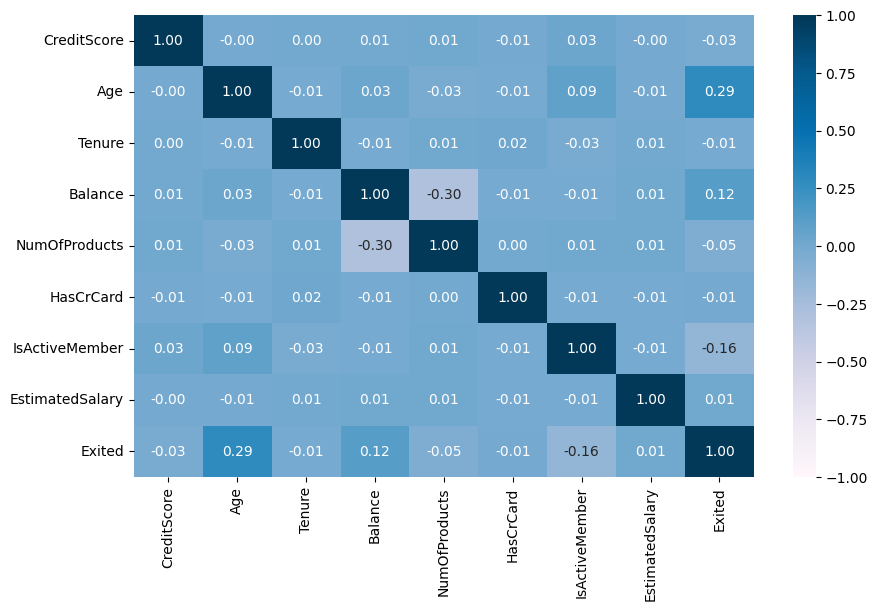

In [ ]:
# Check for corrleations within the data
'''Remember, these correlations require a
continuous value so categorical columns will
not be present
'''
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="PuBu")
plt.show()

**Observations**

* There are no strong correlations between these features
* There are weak correlations among the following pairs:
  * Balance | NumOfProducts (negative)
  * Age | Exited (positive)

####Geography vs. Exited

Exited        0     1    All  Percentage (%)
Geography                                   
All        7963  2037  10000       20.370000
Germany    1695   814   2509       32.443204
France     4204   810   5014       16.154767
Spain      2064   413   2477       16.673395
------------------------------------------------------------------------------------------------------------------------


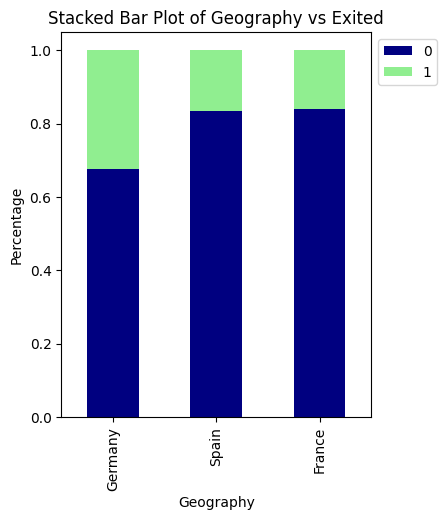

In [ ]:
stacked_barplot(df, 'Geography', 'Exited')

**Observations**

* German customers are about twice as likely to exit within 6 months as both French and Spanish customers
* French and Spanish customers have a near identical attrition rate

####Gender vs. Exited

Exited     0     1    All  Percentage (%)
Gender                                   
All     7963  2037  10000       20.370000
Female  3404  1139   4543       25.071539
Male    4559   898   5457       16.455928
------------------------------------------------------------------------------------------------------------------------


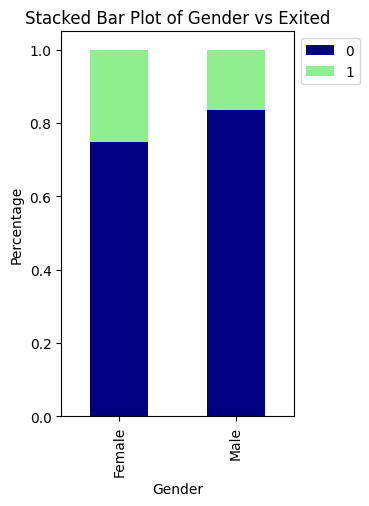

In [ ]:
stacked_barplot(df, 'Gender', 'Exited')

**Observations**
* Women are more likely to churn than men

####HasCrCard vs. Exited

Exited        0     1    All  Percentage (%)
HasCrCard                                   
All        7963  2037  10000       20.370000
1          5631  1424   7055       20.184266
0          2332   613   2945       20.814941
------------------------------------------------------------------------------------------------------------------------


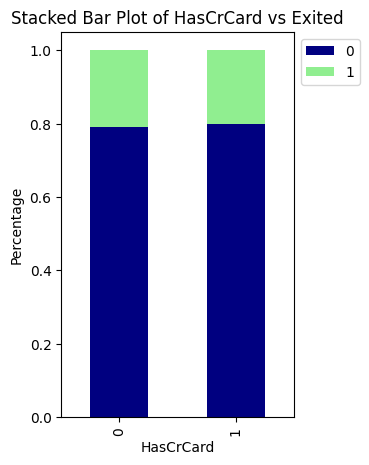

In [ ]:
stacked_barplot(df, 'HasCrCard', 'Exited')

**Observations**

* It does not appear that there is any differeny between customers who do and do not have a credit card with respect to their churn

####IsActivemember vs. Exited

Exited             0     1    All  Percentage (%)
IsActiveMember                                   
All             7963  2037  10000       20.370000
0               3547  1302   4849       26.850897
1               4416   735   5151       14.269074
------------------------------------------------------------------------------------------------------------------------


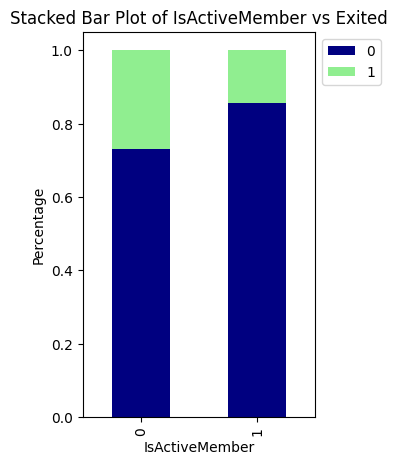

In [ ]:
stacked_barplot(df, 'IsActiveMember', 'Exited')

**Observations**

* Inactive members are nearly twice as likely  (as active members) to leave the bank

####Credit Score vs. Exited

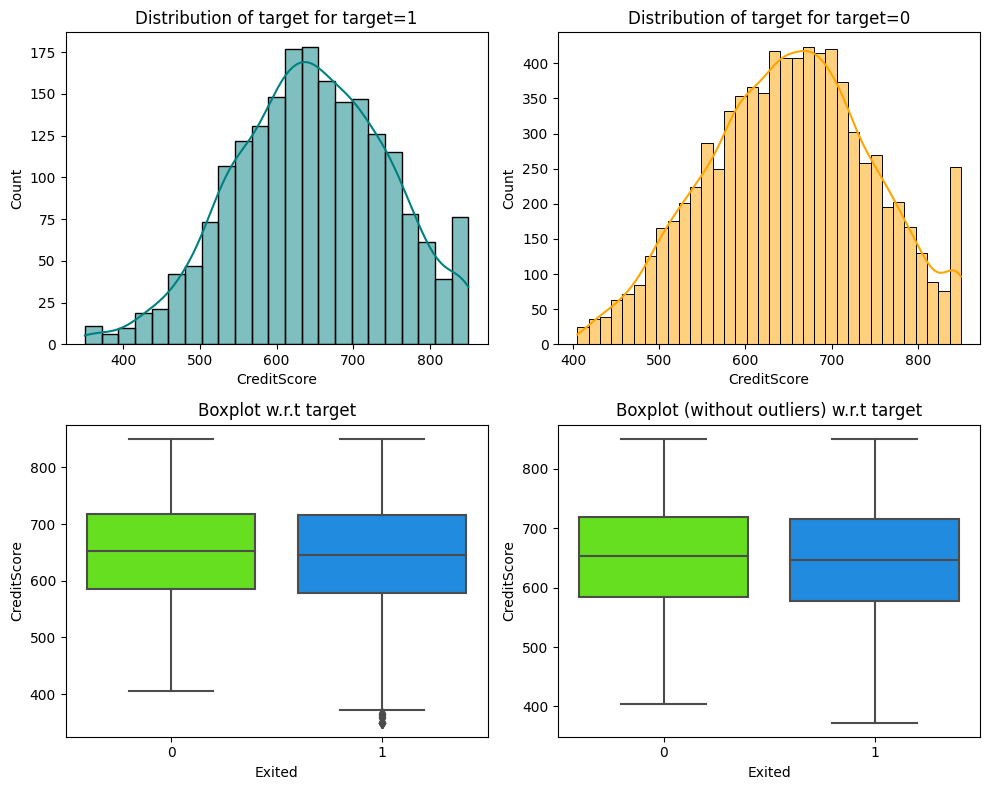

In [ ]:
distribution_plot_wrt_target(df, 'CreditScore', 'Exited')

**Observations**
* Similar distributions among customers who exited and those who did not

####Age vs. Exited

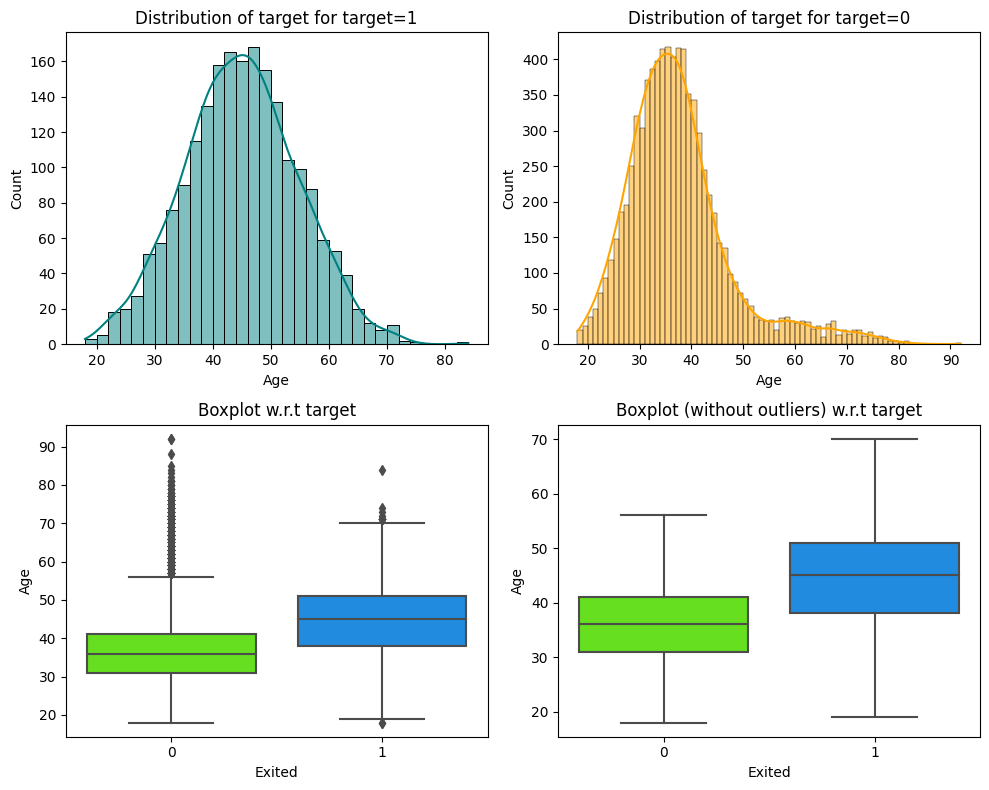

In [ ]:
distribution_plot_wrt_target(df, 'Age', 'Exited')

**Observations**
* Customers who exit tend to be older than those who stay with the bank

####Tenure vs. Exited

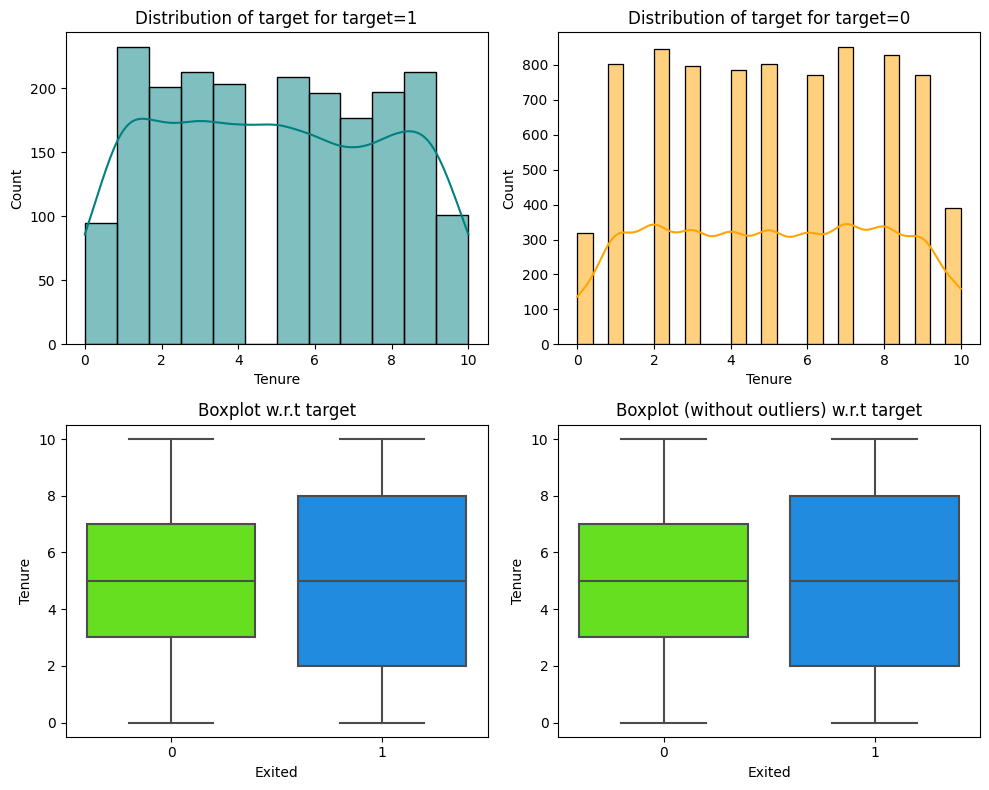

In [ ]:
distribution_plot_wrt_target(df, 'Tenure', 'Exited')

**Observations**
* Similar distributions within Tenure.
* Note that the innerquartile distribution is different for each category

####Balance vs. Exited

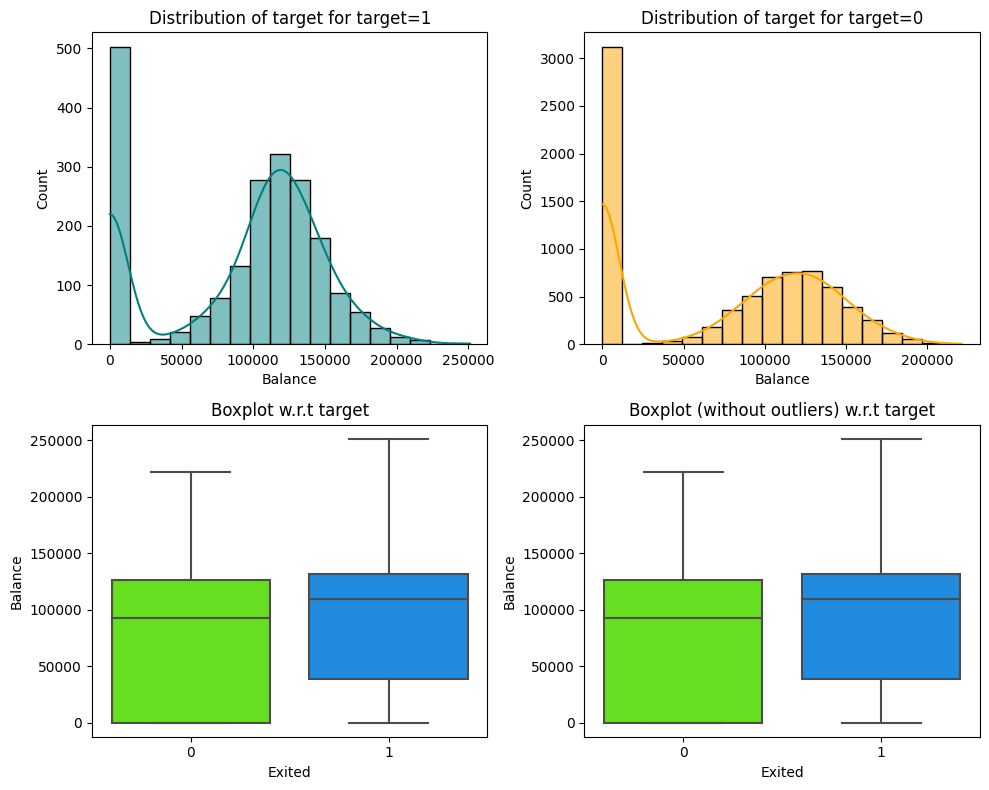

In [ ]:
distribution_plot_wrt_target(df, 'Balance', 'Exited')

**Observations**
* Customers with higher account balances are showing disproportionate churn
* It's interesting to note that customers are probably not leaving due to a low account account balance.
* This could be related to the rates the bank is offering. Are they too low?
* Are the customers who are leaving more "financially savvy" than those who stay?

####NumOfProducts vs. Exited

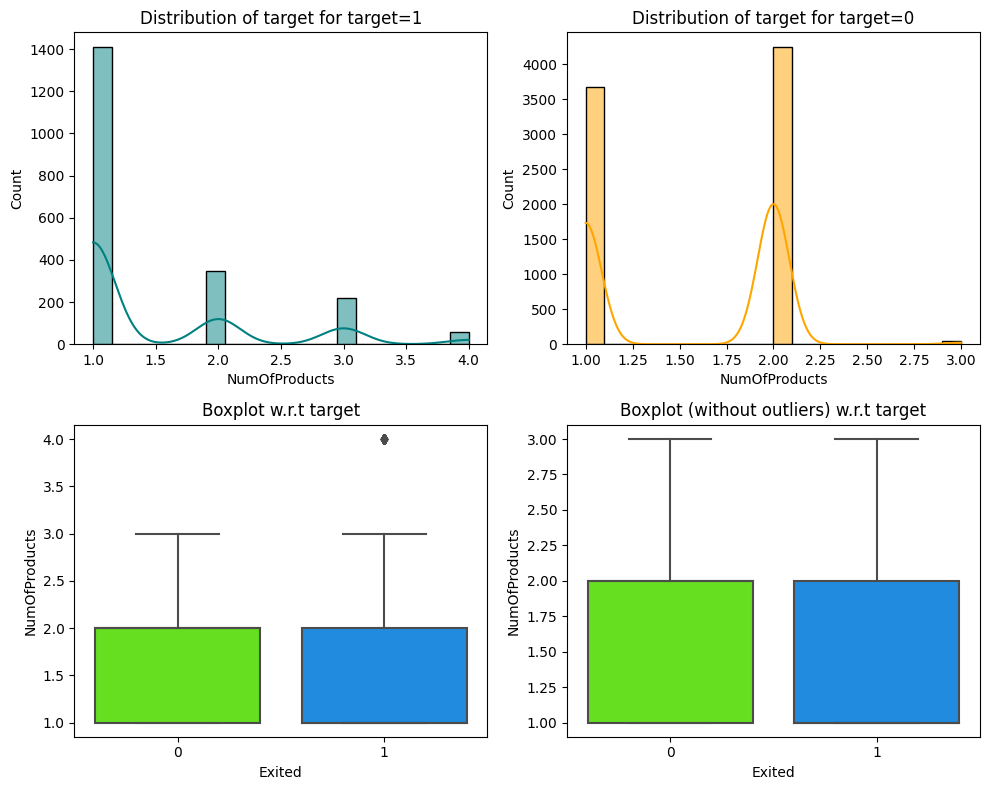

In [ ]:
distribution_plot_wrt_target(df, 'NumOfProducts', 'Exited')

**Observations**
* Most of the attritioning customers have only 1 banking product
* There appears to be a slight correlation between # products and retention (the more products used, the better an ability to retain)


####EstimatedSalary vs. Exited

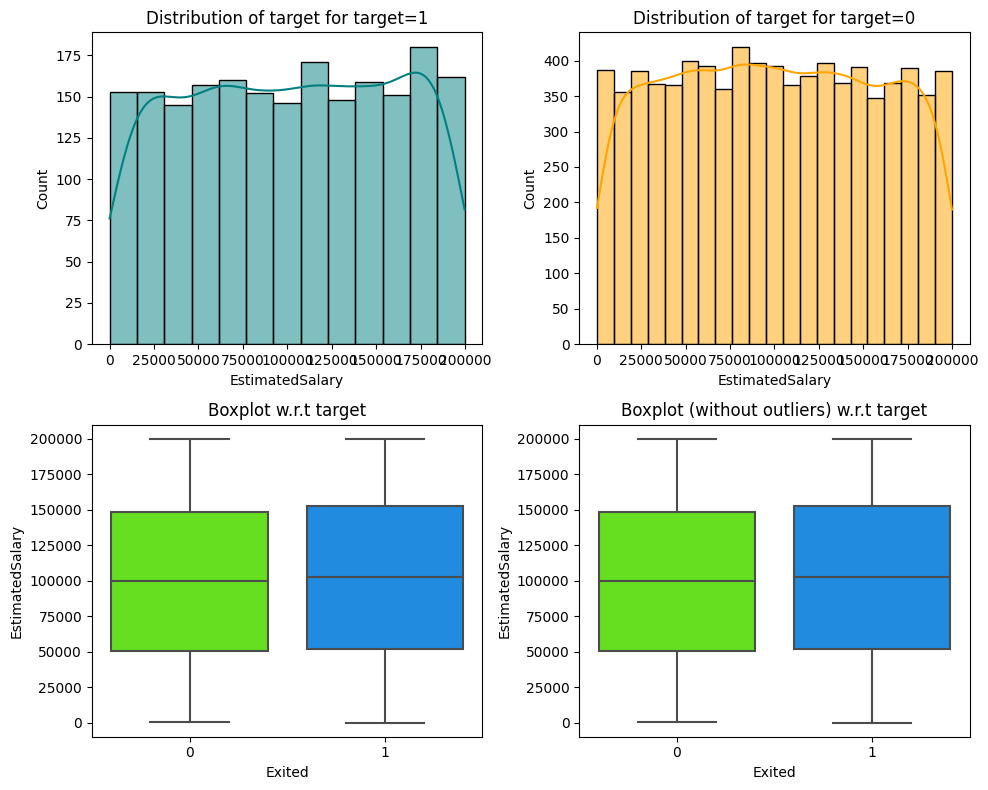

In [ ]:
distribution_plot_wrt_target(df, 'EstimatedSalary', 'Exited')

**Observations**
* Salary data looks mostly the same for both groups

## Data Preprocessing

* Missing value treatment (not needed)
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [ ]:
# Create independent and dependant vairables
X = df.drop(['Exited'],axis=1)
y = df[['Exited']]

###Splitting the Data into Train, Test, and Validation Sets

In [ ]:
# First split - Split training and test data
X_main, X_test, y_main, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)
# Second split - Split the training data set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_main, y_main, test_size=0.2, random_state=42, stratify=y_main, shuffle=True)

### Encode the Categorical Variables

In [ ]:
# encode the indepdendent categorical vairables (Geography and Gender)
X_train = pd.get_dummies(X_train, columns=['Geography', 'Gender'],drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Geography', 'Gender'],drop_first=True)
X_val = pd.get_dummies(X_val, columns=['Geography', 'Gender'],drop_first=True)

### Scale the Data with a Standard Scaler

In [ ]:
## Scale the data using standardscaler
sc=StandardScaler()

temp = sc.fit(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_train[["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]]
)
X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_test[["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]]
)
X_val[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_val[["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]]
)

In [ ]:
# View/validate transformations in the training data set
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
3006,0.988678,0.572685,-1.384980,0.610704,1,1,0,1.566070,0,0,0
5735,-0.683985,0.477619,-0.355056,-1.237347,2,0,1,0.036348,0,1,0
5652,0.410474,-0.948376,1.361485,-1.237347,2,0,0,1.745403,0,0,0
26,1.081604,-0.282911,-1.041672,0.962063,1,1,1,1.228816,1,0,1
3596,-0.085130,-0.282911,-1.728288,1.144427,1,0,0,-0.764748,0,0,1


In [ ]:
X_train.shape

(6400, 11)

**Note:**

Train, test, and validation data sets have been tansformed to:
  * One-hot encode categorical variables (uint8)
  * Scale values to z-scores (normally distributed with Std Dev of 1)

## Model Building

### Model Evaluation Criterion

**Model Should make prediction:**   Which customers are likely to exit in the next 6 months?

**Results will fall into one of four categories:**
1. True Positives - Model predicts the customer will exit and they do
2. False Positives - Model Predicts the customer will exit and they don't
3. True Negatives = Model predicts the customer will not exit and the do not exit
4. False Negatives = Model predicts the customer will not exit and they do

We are most concerned with **FALSE NEGATIVES** for this business problem

Most Important Scoring Mechanism:  **RECALL**


###Visualization Functions

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

### Model Building: Neural Network (classifier)

In [ ]:
# begin with an empty dictionary for our model thresholds
global_thresholds = {}

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Initializing the ANN
classifier = Sequential()
# The amount of nodes (dimensions) in hidden layer should be the average of input and output layers, in this case 64.
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
classifier.add(Dense(activation = 'relu', input_dim = 11, units=64))
#Add 1st hidden layer
classifier.add(Dense(32, activation='relu'))
# Adding the output layer
# Notice that we do not need to specify input dim.
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
classifier.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# Create optimizer with default learning rate
# Compile the model
classifier.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train data for 100 epochs
history=classifier.fit(X_train, y_train,
          validation_data=(X_val,y_val),
          epochs=100,
          batch_size=32)

Epoch 1/100
200/200 [==============================] - 4s 5ms/step - loss: 0.5214 - accuracy: 0.7875 - val_loss: 0.4830 - val_accuracy: 0.7962
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4739 - accuracy: 0.7964 - val_loss: 0.4583 - val_accuracy: 0.7969
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4546 - accuracy: 0.7969 - val_loss: 0.4439 - val_accuracy: 0.8019
Epoch 4/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4424 - accuracy: 0.8005 - val_loss: 0.4357 - val_accuracy: 0.8075
Epoch 5/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4346 - accuracy: 0.8034 - val_loss: 0.4306 - val_accuracy: 0.8112
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4295 - accuracy: 0.8080 - val_loss: 0.4276 - val_accuracy: 0.8150
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4257 - accuracy: 0.8112 - val_loss: 0.4254 - val_accuracy: 0.8144

####Loss Function

63/63 [==============================] - 0s 3ms/step - loss: 0.3466 - accuracy: 0.8570


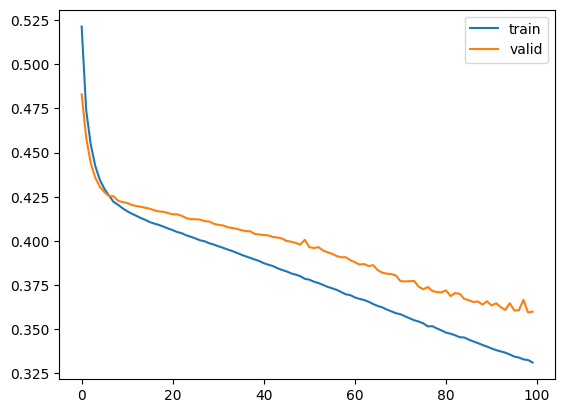

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plot the accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

# Evaluate the model
results = classifier.evaluate(X_test, y_test)

In [ ]:
classifier_thresh = 0.5
global_thresholds['classifier'] = classifier_thresh

####Confusion Matrix

50/50 [==============================] - 0s 2ms/step


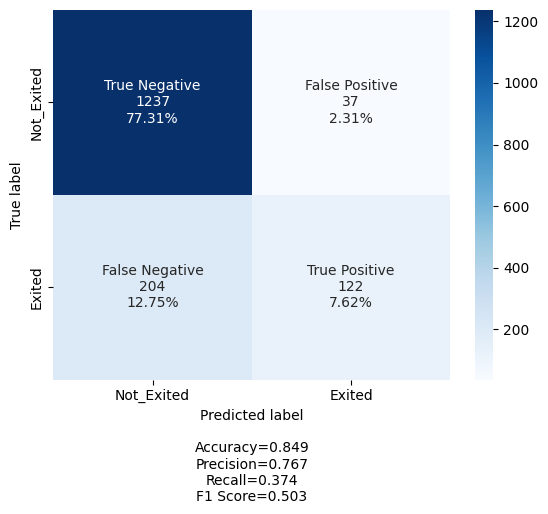

In [ ]:
#Prediction on X_val then obtain the confusion matrix
y_pred1=classifier.predict(X_val)

#Predict using default threshold
y_pred1 = (y_pred1 > 0.5)
cm2=confusion_matrix(y_val, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

### Model Building: Neural Network model with Adam Optimizer (model_e)

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
def create_model():
      ## Initializing the neural network
      model = Sequential()

      # Add the input layer
      model.add(Dense(64,activation='relu',input_dim = X_train.shape[1]))

      # Add the first hidden layer
      model.add(Dense(32,activation='relu'))

      # Add the output layer with Sigmoid Activation
      model.add(Dense(1, activation = 'sigmoid'))

      # Initialize the model with Adam Optimer
      optimizer = tf.keras.optimizers.Adam(0.001)

      ## Compile the model with binary cross entropy as loss function and accuracy as metrics
      model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
      return model

In [ ]:
# Generate the model
model=create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
## Complete the code to fit the model on train data
history = model.fit(X_train,y_train,batch_size=32,validation_data=(X_val,y_val),epochs=100,verbose=1)

Epoch 1/100
200/200 [==============================] - 2s 4ms/step - loss: 0.4512 - accuracy: 0.7998 - val_loss: 0.4334 - val_accuracy: 0.8106
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4101 - accuracy: 0.8283 - val_loss: 0.4177 - val_accuracy: 0.8263
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3970 - accuracy: 0.8327 - val_loss: 0.4077 - val_accuracy: 0.8344
Epoch 4/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3865 - accuracy: 0.8356 - val_loss: 0.4027 - val_accuracy: 0.8331
Epoch 5/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3752 - accuracy: 0.8403 - val_loss: 0.3967 - val_accuracy: 0.8350
Epoch 6/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3660 - accuracy: 0.8473 - val_loss: 0.3878 - val_accuracy: 0.8425
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3592 - accuracy: 0.8480 - val_loss: 0.3799 - val_accuracy: 0.8469

####Loss Function

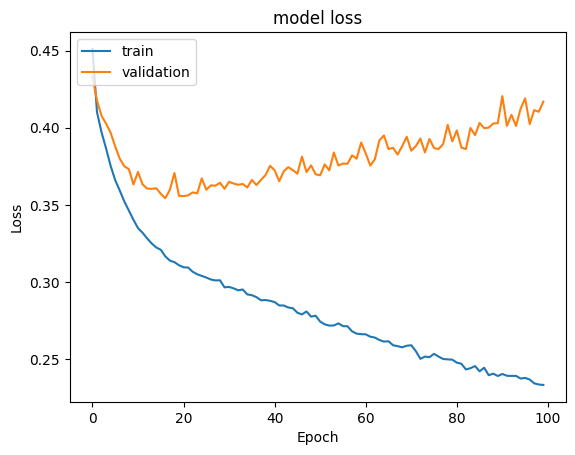

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Model is overfitting. Must stop the model training (Early Stopping).

In [ ]:
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

## Complete the code to call the create_model() function
model_e=create_model()

## Complete the code to train the model on X_train and y_train for 100 epochs and also use X_val and y_val as validation_data
history_e = model_e.fit(X_train,y_train,batch_size=32,epochs=100,verbose=1,validation_data=(X_val,y_val),callbacks=[es_cb])

Epoch 1/100
200/200 [==============================] - 3s 6ms/step - loss: 0.4674 - accuracy: 0.7867 - val_loss: 0.4273 - val_accuracy: 0.8169
Epoch 2/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4124 - accuracy: 0.8238 - val_loss: 0.4140 - val_accuracy: 0.8238
Epoch 3/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3972 - accuracy: 0.8342 - val_loss: 0.4032 - val_accuracy: 0.8369
Epoch 4/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3846 - accuracy: 0.8386 - val_loss: 0.3953 - val_accuracy: 0.8369
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3731 - accuracy: 0.8413 - val_loss: 0.3870 - val_accuracy: 0.8394
Epoch 6/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3638 - accuracy: 0.8462 - val_loss: 0.3741 - val_accuracy: 0.8481
Epoch 7/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3557 - accuracy: 0.8520 - val_loss: 0.3685 - val_accuracy: 0.8444

Training processes stopped after 15 Epochs.

####Loss Function

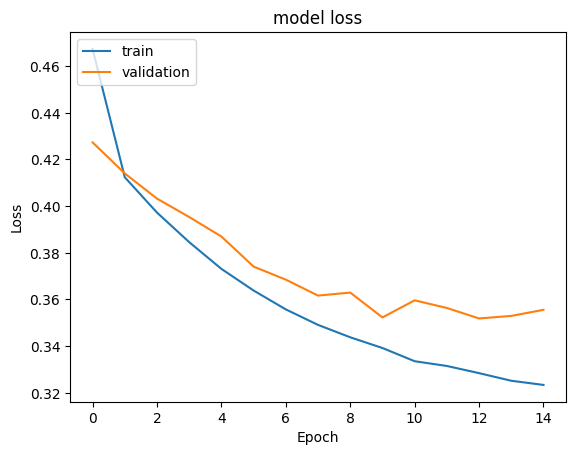

In [ ]:
# Plotting Train Loss vs Validation Loss
plt.plot(history_e.history['loss'])
plt.plot(history_e.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

####Tuning with ROC-AUC

######There are many ways we could locate the threshold with the optimal balance between false positive and true positive rates.

Firstly, the true positive rate is called the Sensitivity. The inverse of the false-positive rate is called the Specificity.

Sensitivity = TruePositive / (TruePositive + FalseNegative)


Specificity = TrueNegative / (FalsePositive + TrueNegative)

Where:

Sensitivity = True Positive Rate

Specificity = 1 – False Positive Rate

The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

G-Mean = sqrt(Sensitivity * Specificity)

One approach would be to test the model with each threshold returned from the call roc_auc_score() and select the threshold with the largest G-Mean value.

200/200 [==============================] - 0s 2ms/step
Best Threshold=0.167119, G-Mean=0.802


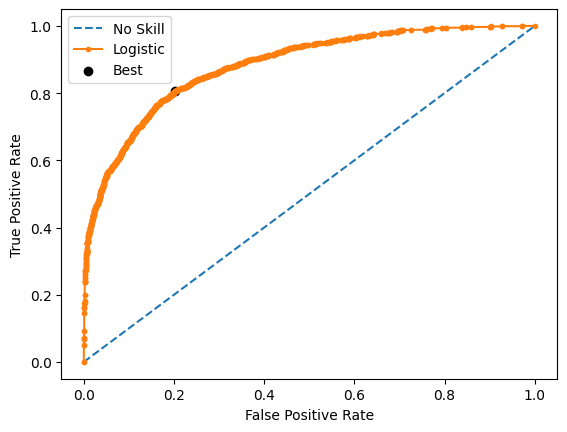

In [ ]:
# predict probabilities
yhat = model_e.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

# Add threshold to dictionary
model_e_thresh = thresholds[ix]
global_thresholds['model_e'] = model_e_thresh

####Predict Results Using Best Threshhold

In [ ]:
#Predicting the results using best as a threshold
y_pred_e=model_e.predict(X_val)
y_pred_e = (y_pred_e > thresholds[ix])
y_pred_e

50/50 [==============================] - 0s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

####Classification Report

In [ ]:
## Obtain the classification report
cr=metrics.classification_report(y_val,y_pred_e)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.78      0.85      1274
           1       0.48      0.77      0.59       326

    accuracy                           0.78      1600
   macro avg       0.70      0.78      0.72      1600
weighted avg       0.84      0.78      0.80      1600



The Recall and F1 scores show improved performance from the original model.

##### Confusion Matrix

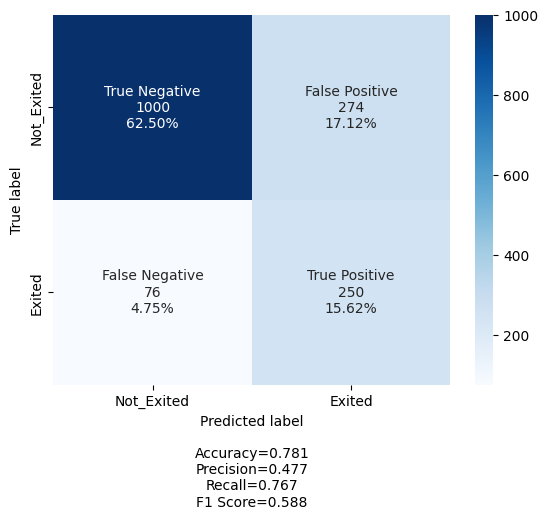

In [ ]:
## Plot the confusion matrix
cm1=confusion_matrix(y_val, y_pred_e)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm1,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

Model performance is acceptable against the validation set. Recall is good, with F1 score refelcting a marginal Precision score.

### Model Improvement: Neural Network model with Dropout (model_3)

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_3 = Sequential()

#Adding the input layer with 32 neurons and relu as activation function
model_3.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))

# Add dropout with dropout_rate= 0.2
model_3.add(Dropout(rate= 0.2))

# Adding the first hidden layer with 16 neurons with relu as activation functions
model_3.add(Dense(16,activation='relu'))

# Add dropout with dropout_rate= 0.1
model_3.add(Dropout(rate= 0.1))
# Adding the second hidden layer with 8 neurons with relu as activation functions
model_3.add(Dense(8,activation='relu'))

# Adding the output layer
model_3.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# Summary of the model
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.1

In [ ]:
# Initialize the ANN with Adam optimizer
optimizer = tf.keras.optimizers.Adam(0.001)

# Compile the model with binary cross entropy as loss function and accuracy as metrics
model_3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
#Fitting the ANN with batch_size = 32 and 100 epochs
history_3 = model_3.fit(X_train,y_train,batch_size=32,epochs=100,verbose=1,validation_data=(X_val,y_val),callbacks=[es_cb])

Epoch 1/100
200/200 [==============================] - 4s 5ms/step - loss: 0.5123 - accuracy: 0.7588 - val_loss: 0.4538 - val_accuracy: 0.7962
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4515 - accuracy: 0.7967 - val_loss: 0.4376 - val_accuracy: 0.7981
Epoch 3/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4369 - accuracy: 0.8025 - val_loss: 0.4335 - val_accuracy: 0.8031
Epoch 4/100
200/200 [==============================] - 1s 6ms/step - loss: 0.4310 - accuracy: 0.8073 - val_loss: 0.4329 - val_accuracy: 0.8087
Epoch 5/100
200/200 [==============================] - 1s 6ms/step - loss: 0.4323 - accuracy: 0.8066 - val_loss: 0.4276 - val_accuracy: 0.8131
Epoch 6/100
200/200 [==============================] - 1s 6ms/step - loss: 0.4300 - accuracy: 0.8119 - val_loss: 0.4229 - val_accuracy: 0.8200
Epoch 7/100
200/200 [==============================] - 1s 6ms/step - loss: 0.4240 - accuracy: 0.8197 - val_loss: 0.4189 - val_accuracy: 0.8200

####Loss Function

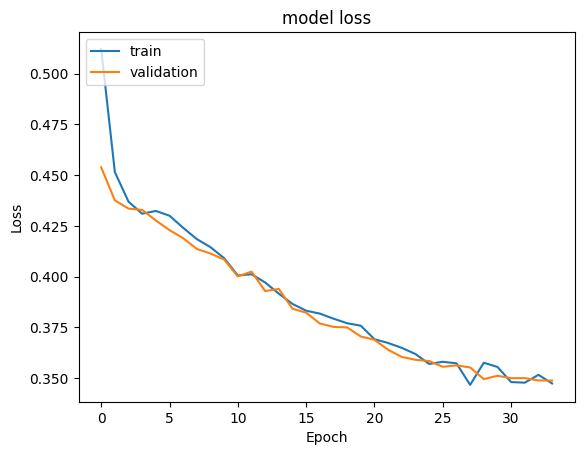

In [ ]:
# Complete the code to plot the Train Loss and Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

200/200 [==============================] - 0s 2ms/step
Best Threshold=0.220600, G-Mean=0.793


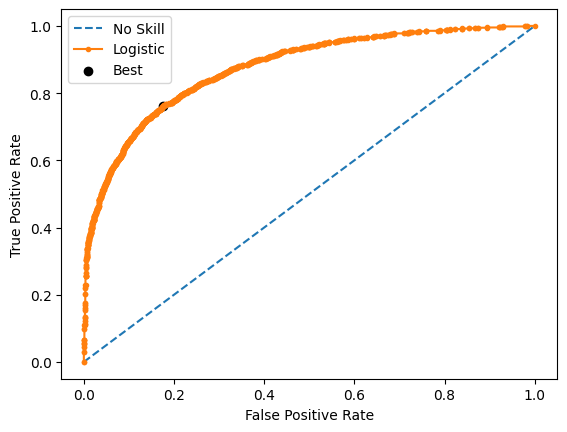

In [ ]:
# predict probabilities
yhat = model_3.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

#Add threshold to dictionary
model_3_thresh = thresholds[ix]
global_thresholds['model_3'] = model_3_thresh

####Predict results using best threshhold

In [ ]:
#Predicting the results using best as a threshold
y_pred_e=model_3.predict(X_val)
y_pred_3 = (y_pred_e > thresholds[ix])
y_pred_3

50/50 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

####Classification Report

In [ ]:
# Obtain the classification report
cr=metrics.classification_report(y_val,y_pred_3)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1274
           1       0.51      0.75      0.61       326

    accuracy                           0.81      1600
   macro avg       0.72      0.78      0.74      1600
weighted avg       0.84      0.81      0.82      1600



####Confusion Matrix

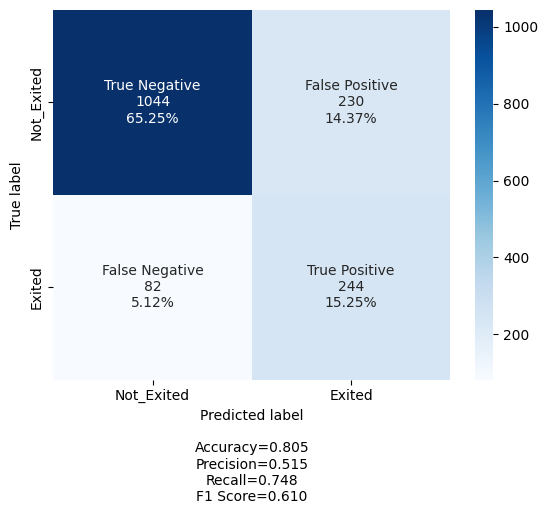

In [ ]:
# Obtain the confusion matrix

cm1=confusion_matrix(y_val, y_pred_3)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm1,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

**Observations**
Slightimprovement over model 1.

This model is also pretty good. Improved F1 score will likely improve the False Negative and False Positive errors.

### Model Improvement: Neural Network model with Hyperparameter tuning (estimator_v2)

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
def create_model_v2(dropout_rate=0.1,lr=0.001,layer_1=64,layer_2=32):
    np.random.seed(1337)

    #Initializing the neural network
    model = Sequential()

    # This adds the input layer (by specifying input dimension)
    model.add(Dense(layer_1,activation='relu',input_dim = X_train.shape[1]))

    ## Complete the code by adding dropout with dropout rate=0.5
    model.add(Dropout(dropout_rate))

    # # Adding the hidden layer
    # Notice that we do not need to specify input dim.
    model.add(Dense(layer_2,activation='relu'))

    # # Adding the output layer
    # Notice that we do not need to specify input dim.
    # we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
    # We use the sigmoid because we want probability outcomes
    model.add(Dense(1, activation='sigmoid'))

    # Adding Adam initializer
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

    ## Complete the code to compile the model using binary_crossentropy as loss
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

####Using GridSearch

In [ ]:
keras_estimator = KerasClassifier(build_fn=create_model_v2, verbose=1)

In [ ]:
# define the grid search parameters
param_grid = {
    'batch_size':[40, 64, 128],
    "model__lr":[0.01,0.001,0.1]}


kfold_splits = 3
# Complete the code by using the the defined keras_estimator as estimator.
grid = GridSearchCV(estimator=keras_estimator,
                    verbose=1,
                    cv=kfold_splits,
                    param_grid=param_grid,n_jobs=-1)

In [ ]:
## Complete the code to fit the model on train data and use x_val and y_val as validation data
grid_result = grid.fit(X_train, y_train, validation_data = (X_val, y_val),verbose=1)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# Printing mean
means = grid_result.cv_results_['mean_test_score']
# Printing standard deviation
stds = grid_result.cv_results_['std_test_score']
# Printing best parameters
params = grid_result.cv_results_['params']

Fitting 3 folds for each of 9 candidates, totalling 27 fits
160/160 [==============================] - 2s 5ms/step - loss: 0.4353 - accuracy: 0.8120 - val_loss: 0.4193 - val_accuracy: 0.8281
Best: 0.820157 using {'batch_size': 40, 'model__lr': 0.01}


####Create model with the hyperparameters

In [ ]:
# Creating the model
estimator_v2=create_model_v2(lr=grid_result.best_params_['model__lr'])
# Printing model summary
estimator_v2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                768       
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
## Fit the model on train data and train the model with best batch_size obtained from hyperparameter tuning
history_h=estimator_v2.fit(X_train, y_train, epochs=100, batch_size = grid_result.best_params_['batch_size'], verbose=1,validation_data=(X_val,y_val))

Epoch 1/100
160/160 [==============================] - 2s 4ms/step - loss: 0.4403 - accuracy: 0.8087 - val_loss: 0.4265 - val_accuracy: 0.8163
Epoch 2/100
160/160 [==============================] - 1s 4ms/step - loss: 0.4054 - accuracy: 0.8313 - val_loss: 0.4065 - val_accuracy: 0.8325
Epoch 3/100
160/160 [==============================] - 1s 4ms/step - loss: 0.3874 - accuracy: 0.8391 - val_loss: 0.3938 - val_accuracy: 0.8381
Epoch 4/100
160/160 [==============================] - 1s 4ms/step - loss: 0.3734 - accuracy: 0.8456 - val_loss: 0.3723 - val_accuracy: 0.8400
Epoch 5/100
160/160 [==============================] - 1s 4ms/step - loss: 0.3570 - accuracy: 0.8533 - val_loss: 0.3719 - val_accuracy: 0.8475
Epoch 6/100
160/160 [==============================] - 1s 3ms/step - loss: 0.3490 - accuracy: 0.8544 - val_loss: 0.3620 - val_accuracy: 0.8537
Epoch 7/100
160/160 [==============================] - 1s 3ms/step - loss: 0.3462 - accuracy: 0.8555 - val_loss: 0.3588 - val_accuracy: 0.8531

####Loss Function

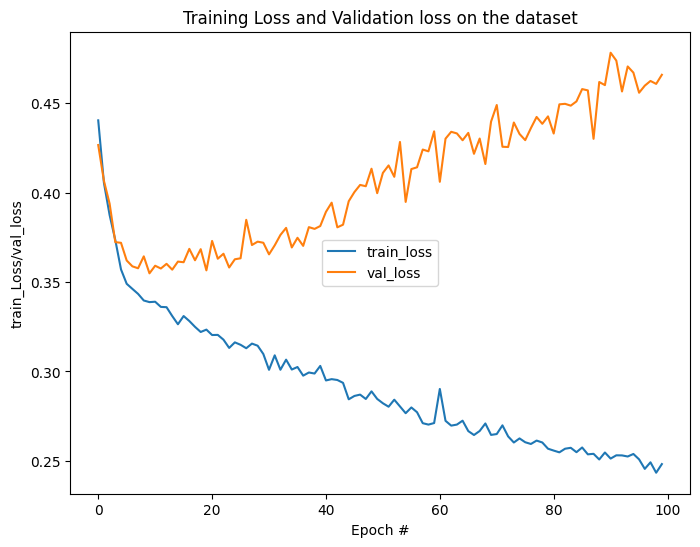

In [ ]:
N =100
plt.figure(figsize=(8,6))
plt.plot(np.arange(0, N), history_h.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history_h.history["val_loss"], label="val_loss")

plt.title("Training Loss and Validation loss on the dataset")
plt.xlabel("Epoch #")
plt.ylabel("train_Loss/val_loss")
plt.legend(loc="center")
plt.show()

####Threshhold

200/200 [==============================] - 1s 2ms/step
Best Threshold=0.256312, G-Mean=0.882


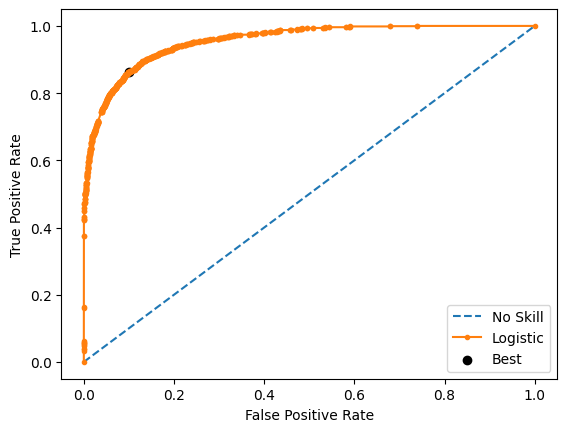

In [ ]:
# predict probabilities
yhat = estimator_v2.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

#Add threshold to dictionary
estimator_v2_thresh = thresholds[ix]
global_thresholds['estimator_v2'] = estimator_v2_thresh

####Predicting results using threshhold

In [ ]:
# Complete the code to obtain the predictions on X_val
y_pred_h = estimator_v2.predict(X_val)
print(y_pred_h)

50/50 [==============================] - 0s 2ms/step
[[2.1555388e-01]
 [2.1486689e-05]
 [8.4707746e-05]
 ...
 [4.6453946e-03]
 [5.8172274e-01]
 [5.6164664e-01]]


In [ ]:
# To use the confusion Matrix, we need to convert the probabilities that a customer will leave the bank into the form true or false.
# So we will use the best cutoff value  to indicate whether they are likely to exit or not.
y_pred_h = (y_pred_h > thresholds[ix])
print(y_pred_h)

[[False]
 [False]
 [False]
 ...
 [False]
 [ True]
 [ True]]


####Classification Report

In [ ]:
# Obtain the classification report
cr=metrics.classification_report(y_val,y_pred_h)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1274
           1       0.50      0.63      0.56       326

    accuracy                           0.80      1600
   macro avg       0.70      0.74      0.72      1600
weighted avg       0.82      0.80      0.81      1600



####Confusion Matrix

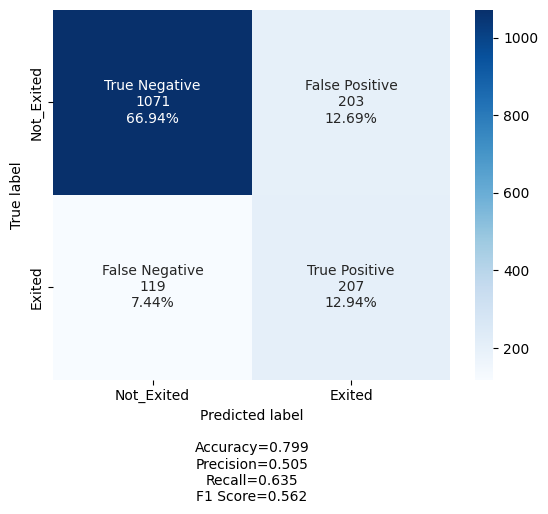

In [ ]:
## Complete the code to obtain the confusion matrix
cm_h=confusion_matrix(y_val, y_pred_h)

labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_h,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

This model didn't perform as well as the previous two but the scores aren't much worse.

### Model Improvement: Neural Network model with balanced data (model_4)

In [ ]:
## Complete the code to apply SMOTE on train data
sm  = SMOTE(random_state=2)
X_train, y_train = sm.fit_resample(X_train, y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train.shape))

After UpSampling, the shape of train_X: (10192, 11)
After UpSampling, the shape of train_y: (10192, 1) 



In [ ]:
# Check the distribution of the target variable
print(y_train.value_counts())

Exited
0         5096
1         5096
dtype: int64


Our classifications are evenly distributed (Balanced)

<Axes: ylabel='count'>

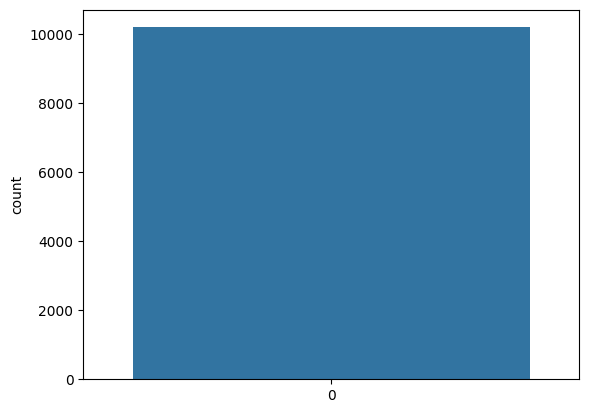

In [ ]:
sns.countplot(y_train['Exited'])

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
## Initilaize a sequential model
model_4 = Sequential()

# Add an input layer of 32 neurons with relu as activation function
model_4.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))

# Add dropout with dropout rate=0.2
model.add(Dropout(rate=0.2))
# Adding hidden layer with 16 neurons with relu as activation function
model_4.add(Dense(16,activation='relu'))

# Adding the dropout
model_4.add(Dropout(0.1))

## Add dense layers with 8 neurons
model_4.add(Dense(8,activation='relu'))

# Add suitable activation function in the final layer
model_4.add(Dense(1, activation = 'sigmoid'))

In [ ]:
## Obtain the summary of the model
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Define earlystopping as callback
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

# Initializing Adam optimizer
optimizer = tf.keras.optimizers.Adam(0.001)

# Complining the model with binary cross entropy as loss and accuracy as metrics
model_4.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])

# Complete the code to fit the model on train with batch_size of 64, epochs of 100 and callbacks as earlystopping
history_4 = model_4.fit(X_train,y_train,batch_size=64,epochs=100,verbose=1,validation_data = (X_val,y_val),callbacks=[es_cb])

Epoch 1/100
160/160 [==============================] - 2s 5ms/step - loss: 0.6599 - accuracy: 0.6124 - val_loss: 0.7013 - val_accuracy: 0.6731
Epoch 2/100
160/160 [==============================] - 1s 4ms/step - loss: 0.6064 - accuracy: 0.7347 - val_loss: 0.6555 - val_accuracy: 0.7431
Epoch 3/100
160/160 [==============================] - 1s 4ms/step - loss: 0.5730 - accuracy: 0.7504 - val_loss: 0.6240 - val_accuracy: 0.7600
Epoch 4/100
160/160 [==============================] - 1s 5ms/step - loss: 0.5457 - accuracy: 0.7611 - val_loss: 0.5974 - val_accuracy: 0.7750
Epoch 5/100
160/160 [==============================] - 1s 6ms/step - loss: 0.5249 - accuracy: 0.7721 - val_loss: 0.5852 - val_accuracy: 0.7713
Epoch 6/100
160/160 [==============================] - 1s 6ms/step - loss: 0.5074 - accuracy: 0.7819 - val_loss: 0.5823 - val_accuracy: 0.7619
Epoch 7/100
160/160 [==============================] - 1s 6ms/step - loss: 0.4931 - accuracy: 0.7885 - val_loss: 0.5403 - val_accuracy: 0.7919

####Loss Function

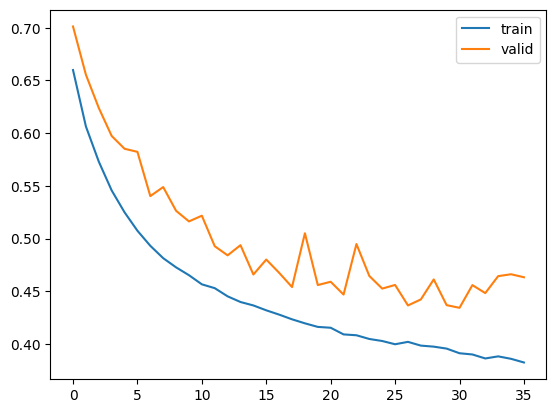

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history_4.history)
hist['epoch'] = history_4.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

####Optimum Threshhold

319/319 [==============================] - 1s 2ms/step
Best Threshold=0.495084, G-Mean=0.845


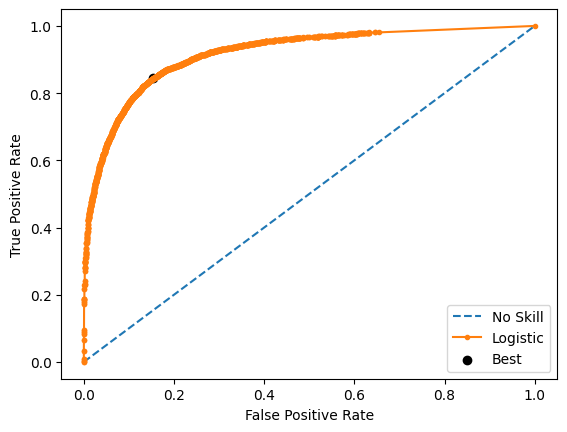

In [ ]:
## Complete the code to find the optimal threshold using X_train
yhat = model_4.predict(X_train)

# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

#Add threshold to dictionary
model_4_thresh = thresholds[ix]
global_thresholds['model_4'] = model_4_thresh

In [ ]:
## Complete the code to obtain the predictions on X_val
y_pred_s = model_4.predict(X_val)
#Predicting the results using tuned threshold
y_pred_s = (y_pred_s >thresholds[ix])
y_pred_s

50/50 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

####Classification Report

In [ ]:
cr=metrics.classification_report(y_val,y_pred_s)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1274
           1       0.50      0.69      0.58       326

    accuracy                           0.80      1600
   macro avg       0.71      0.76      0.72      1600
weighted avg       0.83      0.80      0.81      1600



####Confusion Matrix

In [ ]:
# Checking the target variable counts
print(y_test.value_counts())

Exited
0         1593
1          407
dtype: int64


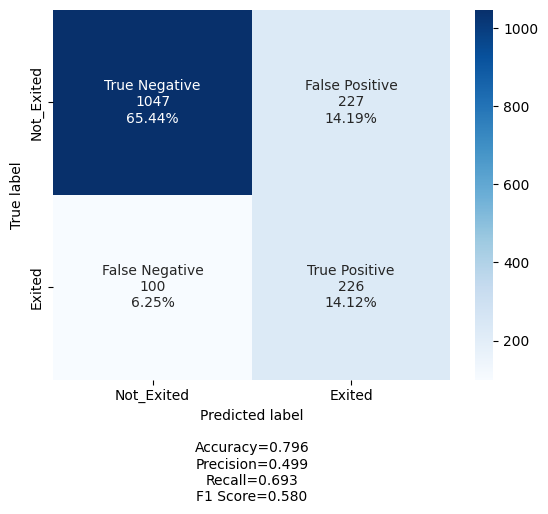

In [ ]:
#Calculating the confusion matrix
cm_s=confusion_matrix(y_val, y_pred_s)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_s,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

This model didn't perform as well as prevous models but could still be used.

## Final Model

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

def compare_models(models, model_names, X_val, y_val, global_thresholds):
    # Initialize an empty list to store result dictionaries
    results_list = []

    for model, name in zip(models, model_names):
        threshold = global_thresholds.get(name)  # Get the threshold for the current model
        y_pred_prob = model.predict(X_val)

        # Check if the prediction is probabilities for binary classification
        if y_pred_prob.ndim > 1 and y_pred_prob.shape[1] == 1:
            y_pred_prob = y_pred_prob.ravel()  # Convert it to (n_samples, )

        # Apply the corresponding threshold to get binary predictions
        y_pred = (y_pred_prob > threshold).astype(int)

        # Calculate metrics
        recall = recall_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)
        accuracy = accuracy_score(y_val, y_pred)

        # Add result dictionary to the list
        results_list.append({
            'Model': name,
            'Recall': recall,
            'Precision': precision,
            'F1-Score': f1,
            'Accuracy': accuracy,
            'Threshold': threshold
        })

    # Convert the list of dictionaries to a DataFrame
    results_df = pd.DataFrame(results_list)
    return results_df

'''
models = [classifier, model_e, model_3, estimator_v2, model_4]
model_names = ['classifier', 'model_e', 'model_3', 'estimator_v2', 'model_4']
# creating updated model names to be more 'readable'
new_model_names = ['NN Classifier', 'NN w/ Adam Optimizer', 'NN w/ Dropout', 'NN w/ Hyperparameter Tuning', 'NN w/ Balanced Data']

# Execute the function
results_df = compare_models(models, model_names, X_val, y_val, global_thresholds)
# Update the model names
results_df['Model'] = new_model_names
# Display the results in a Pandas Dataframe
results_df
'''

"\nmodels = [classifier, model_e, model_3, estimator_v2, model_4]\nmodel_names = ['classifier', 'model_e', 'model_3', 'estimator_v2', 'model_4']\n# creating updated model names to be more 'readable'\nnew_model_names = ['NN Classifier', 'NN w/ Adam Optimizer', 'NN w/ Dropout', 'NN w/ Hyperparameter Tuning', 'NN w/ Balanced Data']\n\n# Execute the function\nresults_df = compare_models(models, model_names, X_val, y_val, global_thresholds)\n# Update the model names\nresults_df['Model'] = new_model_names\n# Display the results in a Pandas Dataframe\nresults_df\n"

In [ ]:
#Defining models
models = [classifier, model_e, model_3, estimator_v2, model_4]
model_names = ['classifier', 'model_e', 'model_3', 'estimator_v2', 'model_4']
# creating updated model names to be more 'readable'
new_model_names = ['NN Classifier', 'NN w/ Adam Optimizer', 'NN w/ Dropout', 'NN w/ Hyperparameter Tuning', 'NN w/ Balanced Data']

# Execute the comparison function
results_df = compare_models(models, model_names, X_val, y_val, global_thresholds)
# Update the model names
results_df['Model'] = new_model_names
# Display the results in a Pandas Dataframe
results_df

50/50 [==============================] - 0s 2ms/step


,Model,Recall,Precision,F1-Score,Accuracy,Threshold
0,NN Classifier,0.374233,0.767296,0.503093,0.849375,0.500000
1,NN w/ Adam Optimizer,0.766871,0.477099,0.588235,0.781250,0.167119
2,NN w/ Dropout,0.748466,0.514768,0.610000,0.805000,0.220600
3,NN w/ Hyperparameter Tuning,0.634969,0.504878,0.562500,0.798750,0.256312
4,NN w/ Balanced Data,0.693252,0.498896,0.580231,0.795625,0.495084


**Observations**

The problem is asking for the business to identify as many at-risk customers as possible. Generally speaking this would mean we must select the model with the highest recall score. The NN w/ Adam Optimizer proves to have the best recall score (`.766871`), however, the NN with Dropout is also a good model and improves scores in every other metric (Accuracy, Precision, F1). It's also more descriminatory with a `.221` threshold.

For these reasons, the **NN with Dropout** (Recall = `0.748466`) is selected.

319/319 [==============================] - 1s 4ms/step
Best Threshold=0.219118, G-Mean=0.809


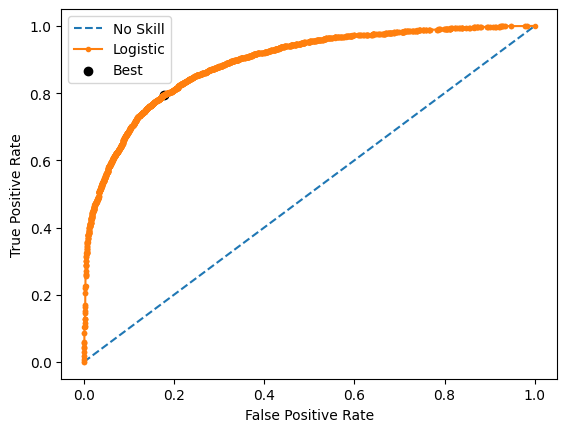

In [ ]:
# predict probabilities using the best model
yhat = model_3.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
# Complete the code to Predict the X_test data using the best model
y_pred_test = model_3.predict(X_test)
y_pred_test = (y_pred_test > thresholds[ix])
print(y_pred_test)

63/63 [==============================] - 0s 2ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


####Classification Report

In [ ]:
## Complete the code to obtain the classification report on y_test and the predicted values
cr=metrics.classification_report(y_test,y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.81      0.87      1593
           1       0.50      0.75      0.60       407

    accuracy                           0.80      2000
   macro avg       0.72      0.78      0.73      2000
weighted avg       0.84      0.80      0.81      2000



####Confusion Matrix

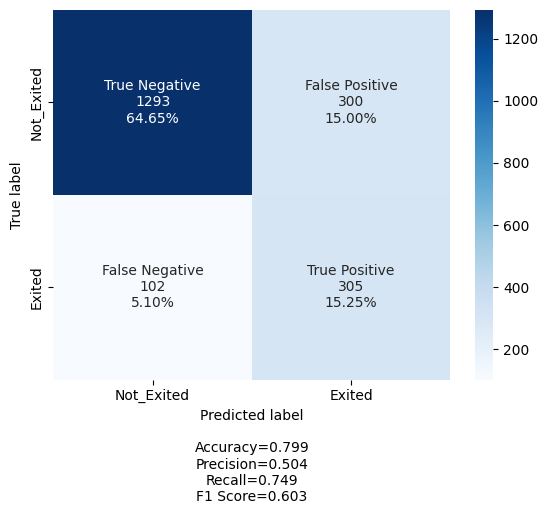

In [ ]:
# Complete the code to obtain the confusion matrix
cm_h=confusion_matrix(y_test, y_pred_test)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_h,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

## Actionable Insights and Recommendations

**What recommedations would you suggest to the bank?**

----------------------------------------------------------
<br>

(From the EDA section:)

**Demographics:**

  * German customers and females lead the geographic category for turnover. It's also noted that there's an indication that the liklihood of a customer leaving the bank increases with their age.

**Activity:**

* Customers who are not active in their accounts are more likely to leave the bank than those who are currently active.
* Customers with higher balances in their account have exited more often than those with lower balances.

<br>

--------------------------------------------------------------------------------
<br>

**Recommendations:**

1. Retention Strategy: The bank may want to investigate why customers with higher balances are leaving and consider strategies to improve retention among this group. This could involve enhanced customer service, better investment opportunities, or more competitive interest rates.

2. Targeted Communication: Communicate with customers who have a balance around the median of the exited group to offer them incentives to stay, as this group seems to be at a higher churn risk.

3. Customer Engagement: Engage with customers who have low to mid-range balances to understand their needs and potentially prevent them from exiting. Since a significant number of customers who left fall into this category, improving satisfaction here might reduce churn.

___